**Importing all the required libraries**





In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor



In [3]:
house = pd.read_csv("train-chennai-sale.csv")
house.head(5)

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [4]:
house.shape # shapes of the dataset

(7109, 22)

In [5]:
house.info()#checking the information and dtypes of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [6]:
house.isnull().sum() #sum of all null values present in the dataset

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [7]:
house.describe() #checking the quantiles, std, minimum values.

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


**Chennai house price prediction intial Cleaning of dataset:**

**AREA**

In [8]:
house.columns
#spelling correction 

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

In [9]:
house.replace("Karapakam","Karapakkam",inplace = True)
house.replace("Ana Nagar","Anna Nagar",inplace = True)
house.replace("Ann Nagar","Anna Nagar",inplace = True)
house.replace("KKNagar","KK Nagar",inplace = True)
house.replace("Adyr","Adyar",inplace = True)
house.replace("Chormpet","Chrompet",inplace = True)
house.replace("Chrompt","Chrompet",inplace = True)
house.replace("Chrmpet","Chrompet",inplace = True)
house.replace("TNagar","T Nagar",inplace = True)
house.replace("Velchery","Velachery",inplace = True)
house.replace("Velacheryr","Velachery",inplace = True)



In [10]:
house.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

**Parking facility**

In [11]:
house.PARK_FACIL.replace("Noo","No",inplace = True)


**Street**

In [12]:
house.STREET.unique()
house.STREET.replace("Pavd","Paved",inplace = True)
house.STREET.replace("NoAccess","No Access",inplace = True)
print(house.STREET.value_counts())



Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64


**DIST_MAINROAD**

In [13]:
house.DIST_MAINROAD.describe()


count    7109.000000
mean       99.603179
std        57.403110
min         0.000000
25%        50.000000
50%        99.000000
75%       148.000000
max       200.000000
Name: DIST_MAINROAD, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


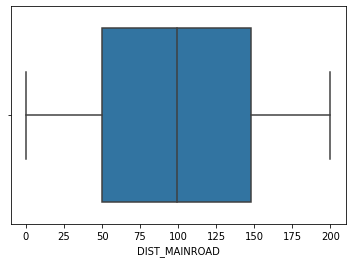

In [14]:
sns.boxplot(house.DIST_MAINROAD);
#checking the outliers using the boxplot , here no outliers is present in the boxplot for dist_mainroad

**N_BEDROOM**

In [15]:
house.N_BEDROOM.value_counts()
#single bedroom house are more in numbers


1.0    3795
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

**Build date And Sale date**

In [16]:
#Creating a new column for year sale and year build 

house.DATE_BUILD = pd.to_datetime(house["DATE_BUILD"])
house.DATE_SALE = pd.to_datetime(house["DATE_SALE"])
house['YEARSALE'] = pd.DatetimeIndex(house['DATE_SALE']).year
house['YEARBUILD'] = pd.DatetimeIndex(house['DATE_BUILD']).year
house["DATE_BUILD"].dtype


dtype('<M8[ns]')

In [17]:
house.drop(["DATE_SALE","DATE_BUILD"],axis = 1)
#dropping the column date sale and date build because we created column for year sale and year build. 
#we use these two columns for further exploration 

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,YEARSALE,YEARBUILD
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000,2011,1967
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,2006,1995
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,2012,1992
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290,2010,1988
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250,2009,1979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,51,1.0,1.0,2,AdjLand,No,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000,2011,1962
7105,P10000,Velachery,1897,52,3.0,2.0,5,Family,Yes,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480,2004,1995
7106,P09594,Velachery,1614,152,2.0,1.0,4,Normal Sale,No,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410,2006,1978
7107,P06508,Karapakkam,787,40,1.0,1.0,2,Partial,Yes,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000,2009,1977


**INT_SQFT**

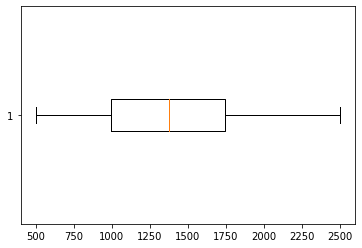

In [18]:
plt.boxplot(house.INT_SQFT,vert = 0);
#checking the outliers for INT_SQT column, no outliers are present in boxplot

In [19]:
house.INT_SQFT.isnull().value_counts()
house.INT_SQFT.describe()

count    7109.000000
mean     1382.073006
std       457.410902
min       500.000000
25%       993.000000
50%      1373.000000
75%      1744.000000
max      2500.000000
Name: INT_SQFT, dtype: float64

**SALE_COND**

In [20]:
#doing spelling correction for all the variables

house.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [21]:
house.SALE_COND.replace("Ab Normal","AbNormal",inplace = True)
house.SALE_COND.replace("Partiall","Partial",inplace = True)
house.SALE_COND.replace("PartiaLl","Partial",inplace = True)
house.SALE_COND.replace("Adj Land","AdjLand",inplace = True)
house.SALE_COND.unique()
house.SALE_COND.value_counts()

AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

**BUILDTYPE**

In [22]:
house.BUILDTYPE.replace("Comercial","Commercial",inplace = True)
house.BUILDTYPE.replace("Other","Others",inplace = True)
house.BUILDTYPE.unique()

array(['Commercial', 'Others', 'House'], dtype=object)

**UTILITY_AVAIL**

In [23]:
house.UTILITY_AVAIL.replace("All Pub","AllPub",inplace = True)
house.UTILITY_AVAIL.unique()
house.UTILITY_AVAIL.value_counts()



AllPub     1887
NoSeWa     1871
NoSewr     1829
ELO        1522
Name: UTILITY_AVAIL, dtype: int64

**MZZONE**

In [24]:
house.MZZONE.unique()
house.MZZONE.value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

**QS_OVERALL**

In [25]:
house.QS_OVERALL.isnull().sum()

48

**Filing the null values with mean values**





In [26]:
#checking the mode values for bedroom and bathroom and replacing those null values with mean and mode values 
house.N_BEDROOM.mode()

0    1.0
dtype: float64

In [27]:
house.N_BATHROOM.mode()

0    1.0
dtype: float64

In [28]:
house['QS_OVERALL'].fillna(house.QS_OVERALL.mean(), inplace=True)
house['N_BEDROOM'].fillna(1, inplace=True)
house['N_BATHROOM'].fillna(1, inplace=True)
house['N_BATHROOM'] = house['N_BATHROOM'].astype(int)
house['N_BEDROOM'] = house['N_BEDROOM'].astype(int)
house.isnull().sum()
house.dtypes

PRT_ID                   object
AREA                     object
INT_SQFT                  int64
DATE_SALE        datetime64[ns]
DIST_MAINROAD             int64
N_BEDROOM                 int64
N_BATHROOM                int64
N_ROOM                    int64
SALE_COND                object
PARK_FACIL               object
DATE_BUILD       datetime64[ns]
BUILDTYPE                object
UTILITY_AVAIL            object
STREET                   object
MZZONE                   object
QS_ROOMS                float64
QS_BATHROOM             float64
QS_BEDROOM              float64
QS_OVERALL              float64
REG_FEE                   int64
COMMIS                    int64
SALES_PRICE               int64
YEARSALE                  int64
YEARBUILD                 int64
dtype: object

**Data** **Visualisation**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


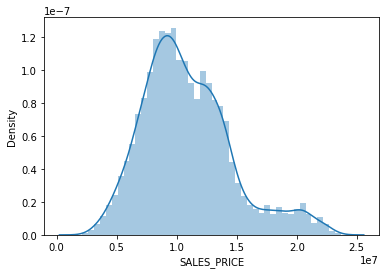

In [29]:
#ploting the distplot for sales price
#data is right skewed 
np.seterr(under='ignore')
sns.distplot(house['SALES_PRICE'],kde=True);
#house["SALES_PRICE"] = np.sqrt(house["SALES_PRICE"])


**Correlation** **matrix**

               INT_SQFT  DIST_MAINROAD  ...  YEARSALE  YEARBUILD
INT_SQFT       1.000000       0.002022  ... -0.123840  -0.009301
DIST_MAINROAD  0.002022       1.000000  ...  0.012821   0.005706
N_BEDROOM      0.786263      -0.002723  ... -0.185263   0.012421
N_BATHROOM     0.515290       0.001850  ... -0.105395   0.001514
N_ROOM         0.951279       0.002301  ... -0.109391   0.013409
QS_ROOMS       0.019850       0.002237  ...  0.003002  -0.018704
QS_BATHROOM   -0.008337      -0.029468  ... -0.000047  -0.021168
QS_BEDROOM     0.008865       0.001554  ...  0.002794   0.018011
QS_OVERALL     0.013989      -0.017255  ...  0.000028  -0.012200
REG_FEE        0.657544       0.011600  ... -0.030000   0.108196
COMMIS         0.571076       0.010994  ...  0.000180   0.087359
SALES_PRICE    0.612125       0.018783  ...  0.000906   0.116043
YEARSALE      -0.123840       0.012821  ...  1.000000   0.228082
YEARBUILD     -0.009301       0.005706  ...  0.228082   1.000000

[14 rows x 14 columns]


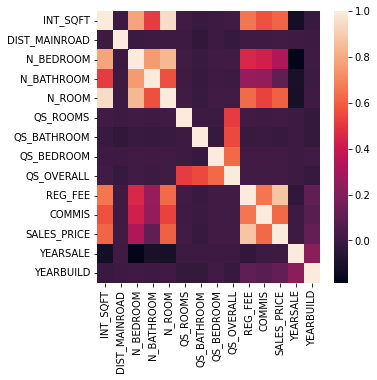

In [30]:

correlation = house.corr()
print(correlation)
x,y = plt.subplots(figsize = (5,5))
sns.heatmap(correlation);

In [31]:
#sales price is our target variable, correaltion between target vs features are shown. if the variable which has  
#high correlation shows the linearity and low correlation shows low linearity
correlation['SALES_PRICE'] 

INT_SQFT         0.612125
DIST_MAINROAD    0.018783
N_BEDROOM        0.330987
N_BATHROOM       0.108834
N_ROOM           0.602760
QS_ROOMS         0.021967
QS_BATHROOM     -0.011377
QS_BEDROOM       0.018804
QS_OVERALL       0.020485
REG_FEE          0.878148
COMMIS           0.626275
SALES_PRICE      1.000000
YEARSALE         0.000906
YEARBUILD        0.116043
Name: SALES_PRICE, dtype: float64

In [32]:
#to find the age of building, yearsale is get substracted with year build
build_sale_duration = house["YEARSALE"].subtract(house["YEARBUILD"])
house["building_Age"] = build_sale_duration

house.drop(["DATE_SALE"],axis=1)
house.drop(["DATE_BUILD"],axis=1)
house.head(5)


,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,YEARSALE,YEARBUILD,building_Age
0,P03210,Karapakkam,1004,2011-04-05,131,1,1,3,AbNormal,Yes,1967-05-15,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000,2011,1967,44
1,P09411,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,1995-12-22,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,2006,1995,11
2,P01812,Adyar,909,2012-04-02,70,1,1,3,AbNormal,Yes,1992-09-02,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,2012,1992,20
3,P05346,Velachery,1855,2010-03-13,14,3,2,5,Family,No,1988-03-18,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290,2010,1988,22
4,P06210,Karapakkam,1226,2009-05-10,84,1,1,3,AbNormal,Yes,1979-10-13,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250,2009,1979,30


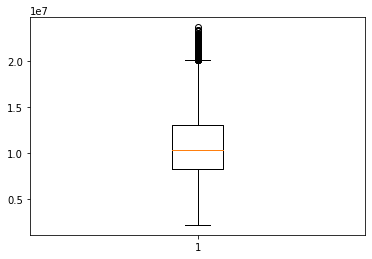

In [33]:
plt.boxplot(house['SALES_PRICE']);
#Sales price has some outliers but this not taken into consideration because the more no of rooms 
#the value of home would be high.these outliers are present for 4 bedrooms house

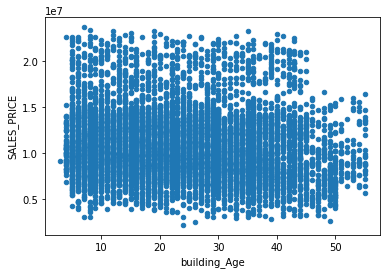

In [34]:
house.plot.scatter(x='building_Age',y='SALES_PRICE')
#this graph shows the clear linear pattern btw the building age and adjusted price

In [35]:
#computing the graph for categorical variable and finding where the graph has linear pattern 
df = [i for i in house.columns if house[i].dtypes == 'O'] 
df

['PRT_ID',
 'AREA',
 'SALE_COND',
 'PARK_FACIL',
 'BUILDTYPE',
 'UTILITY_AVAIL',
 'STREET',
 'MZZONE']

In [36]:
dis_variable = [variable for variable  in df if variable not in ["PRT_ID"]  ]
target_variable = house["SALES_PRICE"]


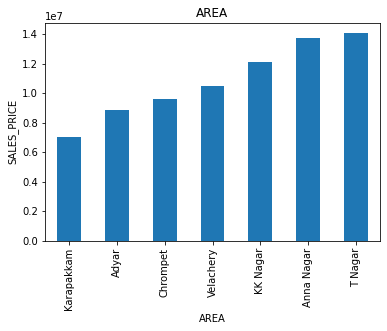

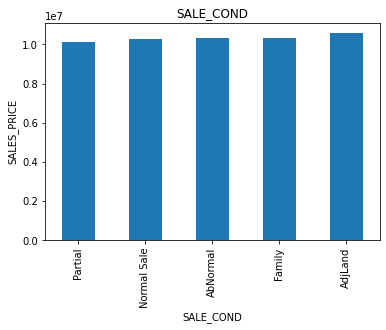

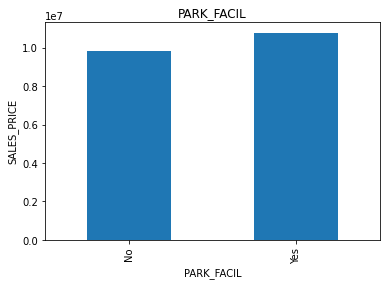

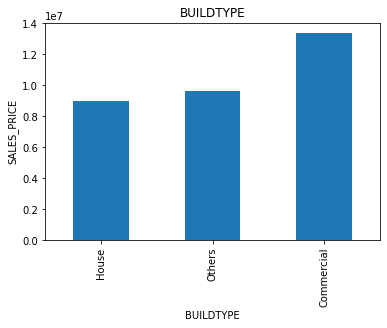

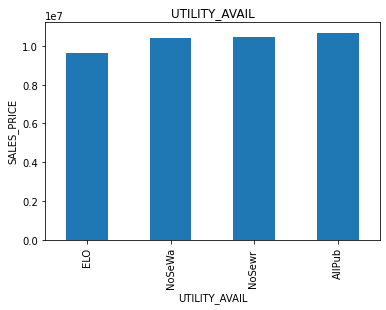

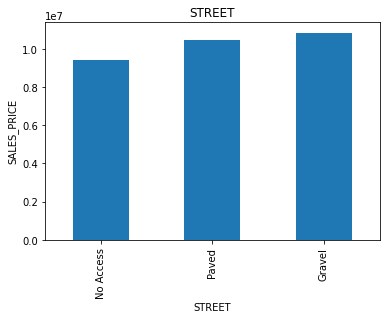

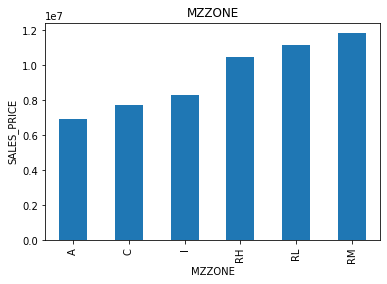

In [37]:
for feature in dis_variable:
    house1 = house.copy()
    house1.groupby(feature)['SALES_PRICE'].median().sort_values().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SALES_PRICE')
    plt.title(feature)
    plt.show()

based on the above graph the Area, MZZone shows the linear pattern we will do lable encoding for those having the linear pattern and for other categorical variable one hot encoding.

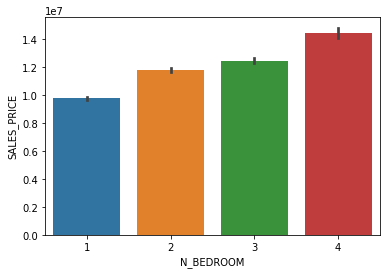

In [38]:
sns.barplot(x="N_BEDROOM",y = "SALES_PRICE",data = house)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


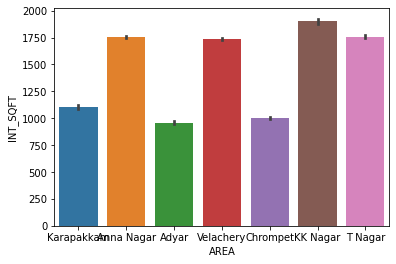

In [39]:
#In this graph we can able to see the kk nagar has more squarefeet as compared to other area.
#but kknagar sales price of house is little low as compared to the tnagar and anna nagar.

sns.barplot(house.AREA,house.INT_SQFT)

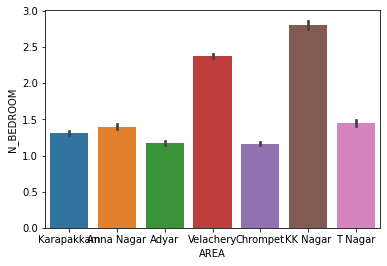

In [40]:
#no of bed rooms in kknagar and velachery are high but per square feet rate for these area is low 
sns.barplot(x="AREA",y = "N_BEDROOM",data = house)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


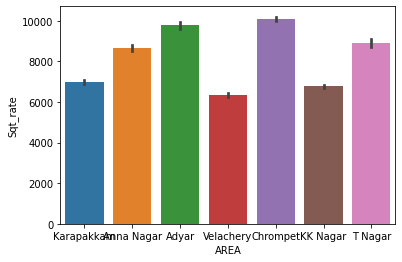

In [41]:
#per square feet rate of chrompet and adayar is high
house["Sqt_rate"] = house["SALES_PRICE"]/house["INT_SQFT"]
sns.barplot(house.AREA,house.Sqt_rate)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


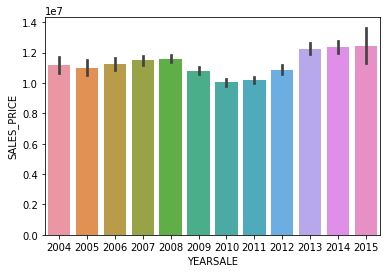

In [42]:
sns.barplot(house["YEARSALE"],y=house["SALES_PRICE"])

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.]),
 <a list of 8 Text major ticklabel objects>)

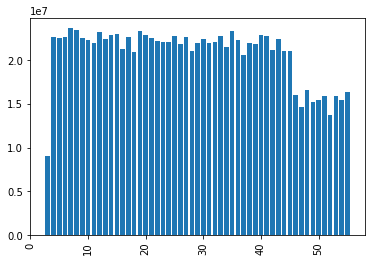

In [43]:

plt.bar(house.building_Age,house.SALES_PRICE,)
plt.xticks(rotation = 90)



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


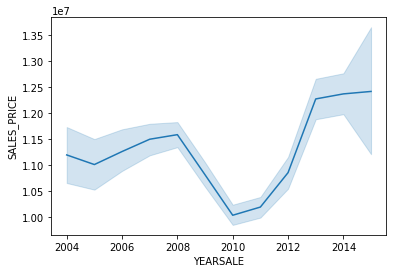

In [44]:
sns.lineplot(house["YEARSALE"],house["SALES_PRICE"])
#In 2010 the sales price of the house has been decreased because of recession happened in real estate.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


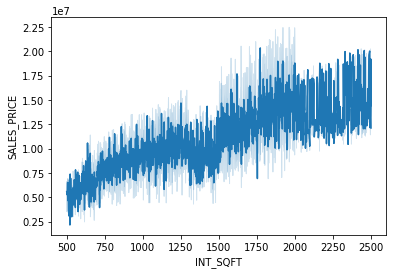

In [45]:
sns.lineplot(house["INT_SQFT"],house["SALES_PRICE"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


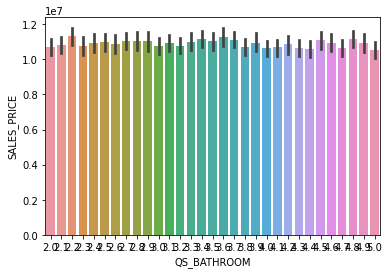

In [46]:
#Qs bathroom, Qs bedroom,Qs rooms doesnt show any linear pattern in the graph so these features are not taken into consideration

sns.barplot(house.QS_BATHROOM,house.SALES_PRICE)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


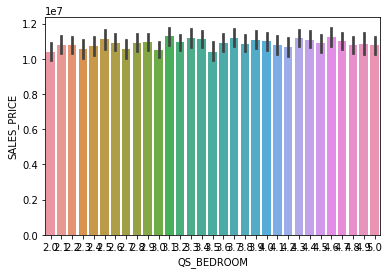

In [47]:
sns.barplot(house.QS_BEDROOM,house.SALES_PRICE)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


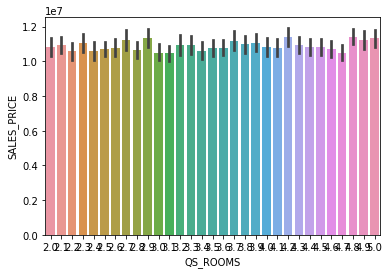

In [48]:
sns.barplot(house.QS_ROOMS,house.SALES_PRICE)

**Data** **Encoding**

In [49]:
house.MZZONE.unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

In [50]:
house.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [51]:
'''#as per linearity shown in graph categorical variable are labelled accordingly

area = {"Karapakkam":0,"Anna Nagar":1,"Adyar":2,"Velachery":3,"Chrompet":4,"KK Nagar":5,"T Nagar":6}
house["AREA_encode"]=house["AREA"].map(area)
#house["AREA_encode"].astype(int)
park = {"Yes":1,"No":0}
house["PARK_FACIL_encode"] = house["PARK_FACIL"].map(park)
Mzone = {"A":0,"C":1,"I":2,"RH":3,"RL":4,"RM":5}
house["MZZONE_encode"] = house["MZZONE"].map(Mzone)

house.isnull().sum()'''

'#as per linearity shown in graph categorical variable are labelled accordingly\n\narea = {"Karapakkam":0,"Anna Nagar":1,"Adyar":2,"Velachery":3,"Chrompet":4,"KK Nagar":5,"T Nagar":6}\nhouse["AREA_encode"]=house["AREA"].map(area)\n#house["AREA_encode"].astype(int)\npark = {"Yes":1,"No":0}\nhouse["PARK_FACIL_encode"] = house["PARK_FACIL"].map(park)\nMzone = {"A":0,"C":1,"I":2,"RH":3,"RL":4,"RM":5}\nhouse["MZZONE_encode"] = house["MZZONE"].map(Mzone)\n\nhouse.isnull().sum()'

one hot encoding gives the best result,if i do label encoding for variables which show linearity the model performance is not good so i choose one hot encoding for all varibales in the data set.

In [52]:
category = house.drop(columns = ["PRT_ID","YEARSALE","Sqt_rate","QS_OVERALL","YEARBUILD","QS_BATHROOM","QS_ROOMS","QS_BEDROOM","building_Age","DATE_SALE","DATE_BUILD","REG_FEE","COMMIS"],axis =1)


data = pd.get_dummies(category)
print(data.columns)
print(data)


Index(['INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM',
       'SALES_PRICE', 'AREA_Adyar', 'AREA_Anna Nagar', 'AREA_Chrompet',
       'AREA_KK Nagar', 'AREA_Karapakkam', 'AREA_T Nagar', 'AREA_Velachery',
       'SALE_COND_AbNormal', 'SALE_COND_AdjLand', 'SALE_COND_Family',
       'SALE_COND_Normal Sale', 'SALE_COND_Partial', 'PARK_FACIL_No',
       'PARK_FACIL_Yes', 'BUILDTYPE_Commercial', 'BUILDTYPE_House',
       'BUILDTYPE_Others', 'UTILITY_AVAIL_AllPub', 'UTILITY_AVAIL_ELO',
       'UTILITY_AVAIL_NoSeWa', 'UTILITY_AVAIL_NoSewr ', 'STREET_Gravel',
       'STREET_No Access', 'STREET_Paved', 'MZZONE_A', 'MZZONE_C', 'MZZONE_I',
       'MZZONE_RH', 'MZZONE_RL', 'MZZONE_RM'],
      dtype='object')
      INT_SQFT  DIST_MAINROAD  N_BEDROOM  ...  MZZONE_RH  MZZONE_RL  MZZONE_RM
0         1004            131          1  ...          0          0          0
1         1986             26          2  ...          1          0          0
2          909             70          1

**Splitting** **the** **data**

In [53]:
#X is my feature and y is my target variable

X = data.drop(columns = ["SALES_PRICE"]).values   
y = data[["SALES_PRICE"]].values     


In [54]:
#splitting the data into train and test 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2, random_state=0)
y_train

array([[18610560],
       [ 8032400],
       [11237140],
       ...,
       [11552700],
       [16882760],
       [12429860]])

**Scaling**

In [55]:
#scaling the splitted values

from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()
scaling.fit_transform(X_train,y_train)
X_train_scaled = scaling.transform(X_train) 
X_test_scaled = scaling.transform(X_test)

**Linear** **regression**

In [56]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)
reg.score(X_train,y_train)


0.9546755995867646

In [57]:
reg.intercept_

array([4666649.18235225])

In [58]:
reg.coef_

array([[ 3.93567082e+03,  1.90404855e+01,  1.88870245e+05,
        -3.64472524e+05,  1.95277735e+05,  5.24420363e+05,
         2.01012974e+06,  5.30625996e+04, -1.52088441e+06,
        -1.89817099e+06,  2.18701675e+06, -1.35557405e+06,
         8.02211128e+03,  3.69334914e+05, -1.25919960e+05,
         1.69909580e+04, -2.68428023e+05, -5.20677806e+05,
         5.20677806e+05,  2.89684026e+06, -1.79949835e+06,
        -1.09734192e+06,  1.90202655e+05, -9.10236178e+04,
        -9.09214340e+04, -8.25760299e+03,  5.62269758e+05,
        -6.13681097e+05,  5.14113399e+04, -1.47740640e+06,
        -9.13241363e+05, -3.37615380e+05,  2.93398060e+05,
         9.00201046e+05,  1.53466403e+06]])

In [59]:
y_pred = reg.predict(X_train)
y_pred

array([[17644765.85040796],
       [ 7637023.38949311],
       [11597973.72253361],
       ...,
       [11672776.30034251],
       [16452302.77098661],
       [12773078.19962741]])

In [60]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred))
print('R2- SCORE:', metrics.r2_score(y_train,y_pred))

Mean Absolute Error: 615998.0998666622
Mean Squared Error: 650476382627.1141
R2- SCORE: 0.9546755995867646


**Random** **forest**

In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error as MSE
#X, y = make_regression(n_features=18, n_informative=2,random_state=0, shuffle=False) 
regr = RandomForestRegressor(n_estimators=100,max_depth=10)
regr.fit(X_train, y_train)
print(regr.score(X_train, y_train))
y_pred = regr.predict(X_test)
print(y_pred)
rmse = np.sqrt(MSE(y_test,y_pred))
print("RMSE : % f" %(rmse))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.9909317135914251
[13681628.88401297 12346938.14845286 19010952.53356113 ...
 13745337.95150719 18126864.4799378   8621741.110088  ]
RMSE :  501108.033599


**xgboost**

In [62]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error as MSE
model_xgboost = xgb.XGBRegressor()
model_xgboost.fit(X_train, y_train)
y_pred = model_xgboost.predict(X_test)
print(y_pred)
print(model_xgboost.score(X_train, y_train))
rmse = np.sqrt(MSE(y_test,y_pred))
print("RMSE : % f" %(rmse))

 

[11:02:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13435566. 12650656. 18916540. ... 13651584. 16419716.  8363221.]
0.9885967162789696
RMSE :  404465.070769


**KNEIGHBORS REGRESSOR**

In [63]:
from sklearn.neighbors import KNeighborsRegressor
#from sklearn.neighbors import KNeighborsRegressor
k_neighbors = KNeighborsRegressor(n_neighbors=1)
k_neighbors.fit(X_train, y_train)
k_neighbors.score(X_train, y_train)

1.0

**Voting** **regressor**

In [67]:
#voting regressor will vote the  best out all algorithm

model1 = LinearRegression()
model2 = SVR(C=3000,epsilon=1,kernel="linear")
model3 = KNeighborsRegressor(n_neighbors=1)
model4 = RandomForestRegressor(n_estimators=500,max_depth=10, random_state=0)
model5 = xgb.XGBRegressor()
model = VotingRegressor([('lr', model1),('svr', model2), ('knn',model3),('Rand', model4),('xgb', model5)]) 
model.fit(X_train,y_train)
preds = model.predict(X_test)
model.score(X_test,y_test) 

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_voting.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[11:08:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9205477693739041

**Hyper** **parameter** **tuning**

In [68]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100) 
  model.fit(X_train,y_train)
  model.score(X_test, y_test) 
  print("Learning rate : ", lr, " Train score : ", model.score(X_train,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, X_test, y_test, cv=10)))

[11:08:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:08:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:08:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:08:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:08:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:08:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:08:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:08:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [69]:
#Best score for the model occurs at the learning rate of 1
#Learning rate :  1  Train score :  0.9935683828258753  Cross-Val score :  0.9700565931516614

In [70]:
from sklearn.ensemble import GradientBoostingRegressor
for lr in [0.01,0.05,0.1,0.3,0.5,0.8,1]:
  model= GradientBoostingRegressor(learning_rate=lr)
  model.fit(X_train, y_train)
  print("Learning rate : ", lr, " Train score : ", model.score(X_train,y_train), " Test score : ", model.score(X_test,y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Learning rate :  0.01  Train score :  0.7024725850532767  Test score :  0.6996220685987089


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Learning rate :  0.05  Train score :  0.968574489537872  Test score :  0.9684313044439303


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Learning rate :  0.1  Train score :  0.9887779108101034  Test score :  0.9879069518389866


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Learning rate :  0.3  Train score :  0.9951902603759334  Test score :  0.9937658590453944


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Learning rate :  0.5  Train score :  0.995360173371337  Test score :  0.9931525677934319


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Learning rate :  0.8  Train score :  0.9951324261652224  Test score :  0.9918697892754325


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Learning rate :  1  Train score :  0.9946127140308059  Test score :  0.990301878227035


In [71]:
#GradientBoostingRegressor
#Learning rate :  1  Train score :  0.9946127140308059  Test score :  0.990301878227035

**Cross** **validation**

In [72]:
import warnings
warnings.simplefilter(action = 'ignore',category = FutureWarning)
from sklearn.model_selection import cross_validate
#model = VotingRegressor
crossval = cross_validate(model, X, y, cv=10, scoring = "r2" , return_train_score=True)
crossval['test_score'].mean(), crossval['train_score'].mean()

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

(0.9891883918769775, 0.9938607334345788)

**Plotting the graph for all predicted values**

In [73]:
model1.fit(X_test, y_test)
model2.fit(X_test, y_test)
model3.fit(X_test, y_test)
model4.fit(X_test, y_test)
model5.fit(X_test, y_test)
model6= VotingRegressor([("lr", model1), ("svr", model2), ("knn", model3),("Rand", model4),("Xgb", model5)])
model6.fit(X_test, y_test)

xt = X[:20]

pred1 = model1.predict(xt)
pred2 = model2.predict(xt)
pred3 = model3.predict(xt)
pred4 = model4.predict(xt)
pred5 = model5.predict(xt)
pred6 = model6.predict(xt)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


[11:09:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_voting.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[11:09:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


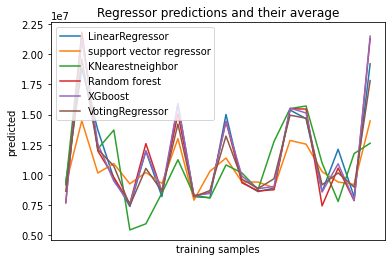

In [74]:
plt.figure()
plt.plot(pred1,label="LinearRegressor")
plt.plot(pred2,label="support vector regressor")
plt.plot(pred3,label="KNearestneighbor")
plt.plot(pred4,label="Random forest")
plt.plot(pred5, label="XGboost")
plt.plot(pred6, ms=10, label="VotingRegressor")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend(loc="best")
plt.title("Regressor predictions and their average")

plt.show()

Text(0.5, 1.0, 'voting regressor')

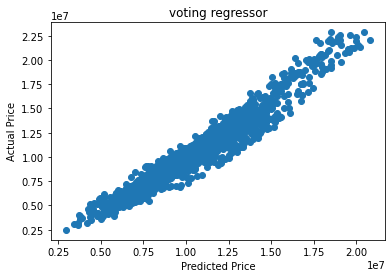

In [75]:
plt.scatter(preds,y_test)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('voting regressor')

**Final Prediction of the sale Price of the house in chennai**

Adjusted price  is the sales price of the building and Adjusted_price_new is the predicted price 

In [76]:

final_prediction = pd.DataFrame()
final_prediction["SALES_PRICEnew"] = pred6
final_prediction['SALES_PRICE'] = house['SALES_PRICE']
final_prediction["AREA"] = house["AREA"]
final_prediction["INT_SQFT"] = house["INT_SQFT"]
final_prediction.to_csv('final_prediction.csv')
from google.colab import files
files.download("final_prediction.csv")

final_prediction.head(10)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,SALES_PRICEnew,SALES_PRICE,AREA,INT_SQFT
0,8.638198e+06,7600000,Karapakkam,1004
1,1.961487e+07,21717770,Anna Nagar,1986
2,1.212097e+07,13159200,Adyar,909
3,1.072679e+07,9630290,Velachery,1855
4,7.458686e+06,7406250,Karapakkam,1226
5,1.054284e+07,12394750,Chrompet,1220
6,8.645262e+06,8488790,Chrompet,1167
7,1.422202e+07,16800250,Velachery,1847
8,8.190429e+06,8308970,Chrompet,771
9,8.698594e+06,8083650,Velachery,1635


In [77]:
#average predicted sales price of karapakkam area.
karapakkam_df = final_prediction[final_prediction['AREA'] == "Karapakkam"]
karapakkam_df.SALES_PRICEnew.mean()

8424086.142079549

In [78]:
#average predicted sales price of annanagar area.
annanagar_df = final_prediction[final_prediction['AREA'] == "Anna Nagar"]
annanagar_df.SALES_PRICEnew.mean()

18720640.427253917

In [79]:
#average predicted sales price of chrompet area.
Chrompet_df = final_prediction[final_prediction['AREA'] == "Chrompet"]
Chrompet_df.SALES_PRICEnew.mean()

9895424.619826403

In [80]:
#average predicted sales price of velachery area.
Velachery_df = final_prediction[final_prediction['AREA'] == "Velachery"]
Velachery_df.SALES_PRICEnew.mean()

12660702.115901867

In [81]:
#average predicted sales price of adyar area.
adyar_df = final_prediction[final_prediction['AREA'] == "Adyar"]
adyar_df.SALES_PRICEnew.mean()

10262667.063951043

In [82]:
#average predicted sales price of kk nagar area.
KK_nagar_df = final_prediction[final_prediction['AREA'] == "KK Nagar"]
KK_nagar_df.SALES_PRICEnew.mean()

nan

In [83]:
##average predicted sales price of Tnagar area.
T_nagar_df = final_prediction[final_prediction['AREA'] == "T Nagar"]
T_nagar_df.SALES_PRICEnew.mean()

nan

Nowadays predicting house price in chennai is a big tasks using the previous data available we are predicting the house of chennai.In this chennai house price prediction we can understood the tnagar, anna nagar area has more price as compared to other area in the dataset.Sale condition of house doesn,t play any role, house sold for sale condition are equally distributed. If Parking facility,good street pavement and pubilic faciity are available in house then the sale price is sligthly high.Per square feet rate for chrompet and adyar is high,velacherry and kk nagar is low. if per squarefeet rate is high there no of rooms in houses are not more than two.  kk nagar and velachery has 4 bedrooms but in adyar mostly single bedrooms house are present due to high sqft rate. 
